<a href="https://colab.research.google.com/github/prathamsss/Clothing-Measrement-Using-Deep-Learning/blob/master/Clothing_Measrements_DensePose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing detectron2 and DensePose

In [ ]:
# install dependencies: 
!pip install pyyaml==5.1 pycocotools>=2.0.1
import torch ##
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

1.6.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.6)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
assert torch.__version__.startswith("1.6")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html
     |████████████████████████████████| 6.6MB 6.1MB/s 
     |████████████████████████████████| 2.2MB 7.0MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.2.post20200910-cp36-none-any.whl size=43839 sha256=dc9593ee45a204050945e2deff6580ead7dd4552b1782f958b1192abcd471e3d
  Stored in directory: /root/.cache/pip/wheels/f8/75/1d/ba08c20cd5b62c7a5af7051ead90e9e6c9c5c9edecdc2d87fd
Successfully built fvcore
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0


In [ ]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-mxdjq8_y
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-mxdjq8_y
  Created wheel for detectron2: filename=detectron2-0.2.1-cp36-cp36m-linux_x86_64.whl size=5200884 sha256=aef16f279de363074f3fd390d268d51000d000a9a031aeb7952ad3895a904f50
  Stored in directory: /tmp/pip-ephem-wheel-cache-h2o1e8rk/wheels/33/ac/bb/5ef90585c21c67e2f0b6aae55ec6b43017ad57af33d5f4c339
  Created wheel for pycocotools: filename=pycocotools-2.0.2-cp36-cp36m-linux_x86_64.whl size=266517 sha256=392402dc7e9fe648d05392c69ce74fa46416b6fe5f58cc48b74a4e0be2db8b57
  Stored in directory: /root/.cache/pip/wheels/68/a5/e7/56401832f23d0b2db351c5b682e466cb4841960b086da65e4e
Successfully built detectron2 pycocotools
  Found existing installation: pycocotools 2.0.1
    Uninstalling pycocotools-2.0.1:
      Successfully uninstalled pycocotools-2.0.1


In [ ]:
!python -m pip install detectron2 -f \
  https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html


In [ ]:
!git clone https://github.com/facebookresearch/detectron2.git

Cloning into 'detectron2'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 6904 (delta 0), reused 1 (delta 0), pack-reused 6901
Receiving objects: 100% (6904/6904), 3.22 MiB | 25.60 MiB/s, done.
Resolving deltas: 100% (4882/4882), done.


In [ ]:
!wget https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl

--2020-09-10 05:50:10--  https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 172.67.9.4, 104.22.74.142, 104.22.75.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|172.67.9.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255757821 (244M) [binary/octet-stream]
Saving to: ‘model_final_162be9.pkl’

model_final_162be9. 100%[===================>] 243.91M  39.5MB/s    in 6.2s    

2020-09-10 05:50:17 (39.5 MB/s) - ‘model_final_162be9.pkl’ saved [255757821/255757821]



In [ ]:
import sys
sys.path.append("/content/detectron2/projects/DensePose/")

!pip install av

     |████████████████████████████████| 36.9MB 87kB/s 


In [ ]:
!python /content/detectron2/projects/DensePose/apply_net.py --config-file /content/detectron2/projects/DensePose/configs/densepose_rcnn_R_50_FPN_s1x.yaml --video-input video-clip.mp4 --confidence-threshold 0.6 --output video-output.mkv \
  --opts MODEL.WEIGHTS /content/model_final_162be9.pkl

usage: apply_net.py [-h] {dump,show} ...
apply_net.py: error: invalid choice: '/content/detectron2/projects/DensePose/configs/densepose_rcnn_R_50_FPN_s1x.yaml' (choose from 'dump', 'show')


In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

from typing import ClassVar, Dict

from detectron2.config import get_cfg
from detectron2.structures.instances import Instances
from detectron2.engine.defaults import DefaultPredictor

from densepose import add_densepose_config
from densepose.vis.base import CompoundVisualizer
from densepose.vis.bounding_box import ScoredBoundingBoxVisualizer
from densepose.vis.extractor import CompoundExtractor, create_extractor

#from detectron2.structures.DensePoseResult
import argparse
import glob
import logging
import os
import pickle
import sys
from typing import Any, ClassVar, Dict, List
import torch
from detectron2.config import get_cfg
from detectron2.data.detection_utils import read_image
from detectron2.engine.defaults import DefaultPredictor
from detectron2.structures.boxes import BoxMode
from detectron2.structures.instances import Instances
from detectron2.utils.logger import setup_logger
from densepose import add_densepose_config, add_hrnet_config
from densepose.utils.logger import verbosity_to_level
from densepose.vis.base import CompoundVisualizer
from densepose.vis.bounding_box import ScoredBoundingBoxVisualizer
from densepose.vis.densepose import (
    DensePoseResultsContourVisualizer,
    DensePoseResultsFineSegmentationVisualizer,
    DensePoseResultsUVisualizer,
    DensePoseResultsVVisualizer,
)
from densepose.vis.extractor import CompoundExtractor, create_extractor
import base64
import html
import io
import time
from IPython.display import display, Javascript
from google.colab.output import eval_js
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from densepose.vis.densepose import (
    DensePoseResultsContourVisualizer,
    DensePoseResultsFineSegmentationVisualizer,
    DensePoseResultsUVisualizer,
    DensePoseResultsVVisualizer,
)

## Configuring the model

In [ ]:
cfg = get_cfg()
add_densepose_config(cfg)
cfg.merge_from_file('/content/detectron2/projects/DensePose/configs/densepose_rcnn_R_50_FPN_s1x.yaml')
cfg.MODEL.DEVICE = 'cuda'
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 
cfg.MODEL.WEIGHTS = '/content/model_final_162be9.pkl'

Config '/content/detectron2/projects/DensePose/configs/densepose_rcnn_R_50_FPN_s1x.yaml' has no VERSION. Assuming it to be compatible with latest v2.


## Creating the predictor

In [ ]:
predictor = DefaultPredictor(cfg)

## Visualizers

In [ ]:
VISUALIZERS: ClassVar[Dict[str, object]] = {
    'dp_contour': DensePoseResultsContourVisualizer,
    'dp_segm': DensePoseResultsFineSegmentationVisualizer,
    'dp_u': DensePoseResultsUVisualizer,
    'dp_v': DensePoseResultsVVisualizer,
    'astype': ScoredBoundingBoxVisualizer,
}

In [ ]:
# def take_photo(filename='photo.jpg', quality=0.8):
#   js = Javascript('''
#     async function takePhoto(quality) {
#       const div = document.createElement('div');
#       const capture = document.createElement('button');
#       capture.textContent = 'Capture';
#       div.appendChild(capture);

#       const video = document.createElement('video');
#       video.style.display = 'block';
#       const stream = await navigator.mediaDevices.getUserMedia({video: true});

#       document.body.appendChild(div);
#       div.appendChild(video);
#       video.srcObject = stream;
#       await video.play();

#       // Resize the output to fit the video element.
#       google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

#       // Wait for Capture to be clicked.
#       await new Promise((resolve) => capture.onclick = resolve);

#       const canvas = document.createElement('canvas');
#       canvas.width = video.videoWidth;
#       canvas.height = video.videoHeight;
#       canvas.getContext('2d').drawImage(video, 0, 0);
#       stream.getVideoTracks()[0].stop();
#       div.remove();
#       return canvas.toDataURL('image/jpeg', quality);
#     }
#     ''')
#   display(js)
#   data = eval_js('takePhoto({})'.format(quality))
#   binary = b64decode(data.split(',')[1])
#   with open(filename, 'wb') as f:
#     f.write(binary)
#   return filename
# image_file = take_photo()


## Predict method

In [ ]:

def predict(img, ext, vis=None):
    img_copy = img.copy()
    instances = predictor(img_copy)['instances'] #Q: Explain that
#     print(instances)

    densepose_result = ext(instances)
#     print('densepose_result: ', densepose_result)
#     print('densepose_result[0]: ', densepose_result[0])
    
    image_vis = None
    for i, result_encoded_w_shape in enumerate(densepose_result.results):
        if i != 0:
            continue
        IUV = DensePoseResult.decode_png_data(*result_encoded_w_shape)
        bbox = densepose_result.boxes_xywh[i]
    if vis:
        image_vis = vis.visualize(img_copy, densepose_result)
        plt.figure(figsize=(20,10))
        plt.imshow(image_vis)
    return (bbox, IUV, image_vis)




In [ ]:

# Copyright (c) Facebook, Inc. and its affiliates. All Rights Reserved
import base64
import numpy as np
from io import BytesIO
from typing import BinaryIO, Dict, List, Optional, Tuple, Union
import torch
from PIL import Image
from torch.nn import functional as F


class DensePoseTransformData(object):

    # Horizontal symmetry label transforms used for horizontal flip
    MASK_LABEL_SYMMETRIES = [0, 1, 3, 2, 5, 4, 7, 6, 9, 8, 11, 10, 13, 12, 14]
    # fmt: off
    POINT_LABEL_SYMMETRIES = [ 0, 1, 2, 4, 3, 6, 5, 8, 7, 10, 9, 12, 11, 14, 13, 16, 15, 18, 17, 20, 19, 22, 21, 24, 23]  # noqa
    # fmt: on

    def __init__(self, uv_symmetries: Dict[str, torch.Tensor], device: torch.device):
        self.mask_label_symmetries = DensePoseTransformData.MASK_LABEL_SYMMETRIES
        self.point_label_symmetries = DensePoseTransformData.POINT_LABEL_SYMMETRIES
        self.uv_symmetries = uv_symmetries
        self.device = torch.device("cpu")

    def to(self, device: torch.device, copy: bool = False) -> "DensePoseTransformData":
        """
        Convert transform data to the specified device

        Args:
            device (torch.device): device to convert the data to
            copy (bool): flag that specifies whether to copy or to reference the data
                in case the device is the same
        Return:
            An instance of `DensePoseTransformData` with data stored on the specified device
        """
        if self.device == device and not copy:
            return self
        uv_symmetry_map = {}
        for key in self.uv_symmetries:
            uv_symmetry_map[key] = self.uv_symmetries[key].to(device=device, copy=copy)
        return DensePoseTransformData(uv_symmetry_map, device)

    @staticmethod
    def load(io: Union[str, BinaryIO]):
        """
        Args:
            io: (str or binary file-like object): input file to load data from
        Returns:
            An instance of `DensePoseTransformData` with transforms loaded from the file
        """
        import scipy.io

        uv_symmetry_map = scipy.io.loadmat(io)
        uv_symmetry_map_torch = {}
        for key in ["U_transforms", "V_transforms"]:
            uv_symmetry_map_torch[key] = []
            map_src = uv_symmetry_map[key]
            map_dst = uv_symmetry_map_torch[key]
            for i in range(map_src.shape[1]):
                map_dst.append(torch.from_numpy(map_src[0, i]).to(dtype=torch.float))
            uv_symmetry_map_torch[key] = torch.stack(map_dst, dim=0)
        transform_data = DensePoseTransformData(uv_symmetry_map_torch, device=torch.device("cpu"))
        return transform_data


class DensePoseDataRelative(object):
    """
    Dense pose relative annotations that can be applied to any bounding box:
        x - normalized X coordinates [0, 255] of annotated points
        y - normalized Y coordinates [0, 255] of annotated points
        i - body part labels 0,...,24 for annotated points
        u - body part U coordinates [0, 1] for annotated points
        v - body part V coordinates [0, 1] for annotated points
        segm - 256x256 segmentation mask with values 0,...,14
    To obtain absolute x and y data wrt some bounding box one needs to first
    divide the data by 256, multiply by the respective bounding box size
    and add bounding box offset:
        x_img = x0 + x_norm * w / 256.0
        y_img = y0 + y_norm * h / 256.0
    Segmentation masks are typically sampled to get image-based masks.
    """

    # Key for normalized X coordinates in annotation dict
    X_KEY = "dp_x"
    # Key for normalized Y coordinates in annotation dict
    Y_KEY = "dp_y"
    # Key for U part coordinates in annotation dict
    U_KEY = "dp_U"
    # Key for V part coordinates in annotation dict
    V_KEY = "dp_V"
    # Key for I point labels in annotation dict
    I_KEY = "dp_I"
    # Key for segmentation mask in annotation dict
    S_KEY = "dp_masks"
    # Number of body parts in segmentation masks
    N_BODY_PARTS = 14
    # Number of parts in point labels
    N_PART_LABELS = 24
    MASK_SIZE = 256

    def __init__(self, annotation, cleanup=False):
        is_valid, reason_not_valid = DensePoseDataRelative.validate_annotation(annotation)
        assert is_valid, "Invalid DensePose annotations: {}".format(reason_not_valid)
        self.x = torch.as_tensor(annotation[DensePoseDataRelative.X_KEY])
        self.y = torch.as_tensor(annotation[DensePoseDataRelative.Y_KEY])
        self.i = torch.as_tensor(annotation[DensePoseDataRelative.I_KEY])
        self.u = torch.as_tensor(annotation[DensePoseDataRelative.U_KEY])
        self.v = torch.as_tensor(annotation[DensePoseDataRelative.V_KEY])
        self.segm = DensePoseDataRelative.extract_segmentation_mask(annotation)
        self.device = torch.device("cpu")
        if cleanup:
            DensePoseDataRelative.cleanup_annotation(annotation)

    def to(self, device):
        if self.device == device:
            return self
        new_data = DensePoseDataRelative.__new__(DensePoseDataRelative)
        new_data.x = self.x
        new_data.x = self.x.to(device)
        new_data.y = self.y.to(device)
        new_data.i = self.i.to(device)
        new_data.u = self.u.to(device)
        new_data.v = self.v.to(device)
        new_data.segm = self.segm.to(device)
        new_data.device = device
        return new_data

    @staticmethod
    def extract_segmentation_mask(annotation):
        poly_specs = annotation[DensePoseDataRelative.S_KEY]
        if isinstance(poly_specs, torch.Tensor):
            # data is already given as mask tensors, no need to decode
            return poly_specs

        import pycocotools.mask as mask_utils

        segm = torch.zeros((DensePoseDataRelative.MASK_SIZE,) * 2, dtype=torch.float32)
        for i in range(DensePoseDataRelative.N_BODY_PARTS):
            poly_i = poly_specs[i]
            if poly_i:
                mask_i = mask_utils.decode(poly_i)
                segm[mask_i > 0] = i + 1
        return segm

    @staticmethod
    def validate_annotation(annotation):
        for key in [
            DensePoseDataRelative.X_KEY,
            DensePoseDataRelative.Y_KEY,
            DensePoseDataRelative.I_KEY,
            DensePoseDataRelative.U_KEY,
            DensePoseDataRelative.V_KEY,
            DensePoseDataRelative.S_KEY,
        ]:
            if key not in annotation:
                return False, "no {key} data in the annotation".format(key=key)
        return True, None

    @staticmethod
    def cleanup_annotation(annotation):
        for key in [
            DensePoseDataRelative.X_KEY,
            DensePoseDataRelative.Y_KEY,
            DensePoseDataRelative.I_KEY,
            DensePoseDataRelative.U_KEY,
            DensePoseDataRelative.V_KEY,
            DensePoseDataRelative.S_KEY,
        ]:
            if key in annotation:
                del annotation[key]

    def apply_transform(self, transforms, densepose_transform_data):
        self._transform_pts(transforms, densepose_transform_data)
        self._transform_segm(transforms, densepose_transform_data)

    def _transform_pts(self, transforms, dp_transform_data):
        import detectron2.data.transforms as T

        # NOTE: This assumes that HorizFlipTransform is the only one that does flip
        do_hflip = sum(isinstance(t, T.HFlipTransform) for t in transforms.transforms) % 2 == 1
        if do_hflip:
            self.x = self.segm.size(1) - self.x
            self._flip_iuv_semantics(dp_transform_data)

        for t in transforms.transforms:
            if isinstance(t, T.RotationTransform):
                xy_scale = np.array((t.w, t.h)) / DensePoseDataRelative.MASK_SIZE
                xy = t.apply_coords(np.stack((self.x, self.y), axis=1) * xy_scale)
                self.x, self.y = torch.tensor(xy / xy_scale, dtype=self.x.dtype).T

    def _flip_iuv_semantics(self, dp_transform_data: DensePoseTransformData) -> None:
        i_old = self.i.clone()
        uv_symmetries = dp_transform_data.uv_symmetries
        pt_label_symmetries = dp_transform_data.point_label_symmetries
        for i in range(self.N_PART_LABELS):
            if i + 1 in i_old:
                annot_indices_i = i_old == i + 1
                if pt_label_symmetries[i + 1] != i + 1:
                    self.i[annot_indices_i] = pt_label_symmetries[i + 1]
                u_loc = (self.u[annot_indices_i] * 255).long()
                v_loc = (self.v[annot_indices_i] * 255).long()
                self.u[annot_indices_i] = uv_symmetries["U_transforms"][i][v_loc, u_loc].to(
                    device=self.u.device
                )
                self.v[annot_indices_i] = uv_symmetries["V_transforms"][i][v_loc, u_loc].to(
                    device=self.v.device
                )

    def _transform_segm(self, transforms, dp_transform_data):
        import detectron2.data.transforms as T

        # NOTE: This assumes that HorizFlipTransform is the only one that does flip
        do_hflip = sum(isinstance(t, T.HFlipTransform) for t in transforms.transforms) % 2 == 1
        if do_hflip:
            self.segm = torch.flip(self.segm, [1])
            self._flip_segm_semantics(dp_transform_data)

        for t in transforms.transforms:
            if isinstance(t, T.RotationTransform):
                self._transform_segm_rotation(t)

    def _flip_segm_semantics(self, dp_transform_data):
        old_segm = self.segm.clone()
        mask_label_symmetries = dp_transform_data.mask_label_symmetries
        for i in range(self.N_BODY_PARTS):
            if mask_label_symmetries[i + 1] != i + 1:
                self.segm[old_segm == i + 1] = mask_label_symmetries[i + 1]

    def _transform_segm_rotation(self, rotation):
        self.segm = F.interpolate(self.segm[None, None, :], (rotation.h, rotation.w)).numpy()
        self.segm = torch.tensor(rotation.apply_segmentation(self.segm[0, 0]))[None, None, :]
        self.segm = F.interpolate(self.segm, [DensePoseDataRelative.MASK_SIZE] * 2)[0, 0]


def normalized_coords_transform(x0, y0, w, h):
    """
    Coordinates transform that maps top left corner to (-1, -1) and bottom
    right corner to (1, 1). Used for torch.grid_sample to initialize the
    grid
    """

    def f(p):
        return (2 * (p[0] - x0) / w - 1, 2 * (p[1] - y0) / h - 1)

    return f


class DensePoseOutput(object):
    def __init__(self, S, I, U, V, confidences):
        """
        Args:
            S (`torch.Tensor`): coarse segmentation tensor of size (N, A, H, W)
            I (`torch.Tensor`): fine segmentation tensor of size (N, C, H, W)
            U (`torch.Tensor`): U coordinates for each fine segmentation label of size (N, C, H, W)
            V (`torch.Tensor`): V coordinates for each fine segmentation label of size (N, C, H, W)
            confidences (dict of str -> `torch.Tensor`) estimated confidence model parameters
        """
        self.S = S
        self.I = I  # noqa: E741
        self.U = U
        self.V = V
        self.confidences = confidences
        self._check_output_dims(S, I, U, V)

    def _check_output_dims(self, S, I, U, V):
        assert (
            len(S.size()) == 4
        ), "Segmentation output should have 4 " "dimensions (NCHW), but has size {}".format(
            S.size()
        )
        assert (
            len(I.size()) == 4
        ), "Segmentation output should have 4 " "dimensions (NCHW), but has size {}".format(
            S.size()
        )
        assert (
            len(U.size()) == 4
        ), "Segmentation output should have 4 " "dimensions (NCHW), but has size {}".format(
            S.size()
        )
        assert (
            len(V.size()) == 4
        ), "Segmentation output should have 4 " "dimensions (NCHW), but has size {}".format(
            S.size()
        )
        assert len(S) == len(I), (
            "Number of output segmentation planes {} "
            "should be equal to the number of output part index "
            "planes {}".format(len(S), len(I))
        )
        assert S.size()[2:] == I.size()[2:], (
            "Output segmentation plane size {} "
            "should be equal to the output part index "
            "plane size {}".format(S.size()[2:], I.size()[2:])
        )
        assert I.size() == U.size(), (
            "Part index output shape {} "
            "should be the same as U coordinates output shape {}".format(I.size(), U.size())
        )
        assert I.size() == V.size(), (
            "Part index output shape {} "
            "should be the same as V coordinates output shape {}".format(I.size(), V.size())
        )

    def resize(self, image_size_hw):
        # do nothing - outputs are invariant to resize
        pass

    def _crop(self, S, I, U, V, bbox_old_xywh, bbox_new_xywh):
        """
        Resample S, I, U, V from bbox_old to the cropped bbox_new
        """
        x0old, y0old, wold, hold = bbox_old_xywh
        x0new, y0new, wnew, hnew = bbox_new_xywh
        tr_coords = normalized_coords_transform(x0old, y0old, wold, hold)
        topleft = (x0new, y0new)
        bottomright = (x0new + wnew, y0new + hnew)
        topleft_norm = tr_coords(topleft)
        bottomright_norm = tr_coords(bottomright)
        hsize = S.size(1)
        wsize = S.size(2)
        grid = torch.meshgrid(
            torch.arange(
                topleft_norm[1],
                bottomright_norm[1],
                (bottomright_norm[1] - topleft_norm[1]) / hsize,
            )[:hsize],
            torch.arange(
                topleft_norm[0],
                bottomright_norm[0],
                (bottomright_norm[0] - topleft_norm[0]) / wsize,
            )[:wsize],
        )
        grid = torch.stack(grid, dim=2).to(S.device)
        assert (
            grid.size(0) == hsize
        ), "Resampled grid expected " "height={}, actual height={}".format(hsize, grid.size(0))
        assert grid.size(1) == wsize, "Resampled grid expected " "width={}, actual width={}".format(
            wsize, grid.size(1)
        )
        S_new = F.grid_sample(
            S.unsqueeze(0),
            torch.unsqueeze(grid, 0),
            mode="bilinear",
            padding_mode="border",
            align_corners=True,
        ).squeeze(0)
        I_new = F.grid_sample(
            I.unsqueeze(0),
            torch.unsqueeze(grid, 0),
            mode="bilinear",
            padding_mode="border",
            align_corners=True,
        ).squeeze(0)
        U_new = F.grid_sample(
            U.unsqueeze(0),
            torch.unsqueeze(grid, 0),
            mode="bilinear",
            padding_mode="border",
            align_corners=True,
        ).squeeze(0)
        V_new = F.grid_sample(
            V.unsqueeze(0),
            torch.unsqueeze(grid, 0),
            mode="bilinear",
            padding_mode="border",
            align_corners=True,
        ).squeeze(0)
        return S_new, I_new, U_new, V_new

    def crop(self, indices_cropped, bboxes_old, bboxes_new):
        """
        Crop outputs for selected bounding boxes to the new bounding boxes.
        """
        # VK: cropping is ignored for now
        # for i, ic in enumerate(indices_cropped):
        #    self.S[ic], self.I[ic], self.U[ic], self.V[ic] = \
        #        self._crop(self.S[ic], self.I[ic], self.U[ic], self.V[ic],
        #        bboxes_old[i], bboxes_new[i])
        pass

    def hflip(self, transform_data: DensePoseTransformData) -> None:
        """
        Change S, I, U and V to take into account a Horizontal flip.
        """
        if self.I.shape[0] > 0:
            for el in "SIUV":
                self.__dict__[el] = torch.flip(self.__dict__[el], [3])
            for key in self.confidences:
                self.confidences[key] = torch.flip(self.confidences[key], [3])
            self._flip_iuv_semantics_tensor(transform_data)
            self._flip_segm_semantics_tensor(transform_data)

    def _flip_iuv_semantics_tensor(self, dp_transform_data: DensePoseTransformData) -> None:
        point_label_symmetries = dp_transform_data.point_label_symmetries
        uv_symmetries = dp_transform_data.uv_symmetries

        N, C, H, W = self.U.shape
        u_loc = (self.U[:, 1:, :, :].clamp(0, 1) * 255).long()
        v_loc = (self.V[:, 1:, :, :].clamp(0, 1) * 255).long()
        Iindex = torch.arange(C - 1, device=self.U.device)[None, :, None, None].expand(
            N, C - 1, H, W
        )
        self.U[:, 1:, :, :] = uv_symmetries["U_transforms"][Iindex, v_loc, u_loc]
        self.V[:, 1:, :, :] = uv_symmetries["V_transforms"][Iindex, v_loc, u_loc]

        for el in "IUV":
            self.__dict__[el] = self.__dict__[el][:, point_label_symmetries, :, :]

    def _flip_segm_semantics_tensor(self, dp_transform_data):
        if self.S.shape[1] == DensePoseDataRelative.N_BODY_PARTS + 1:
            self.S = self.S[:, dp_transform_data.mask_label_symmetries, :, :]

    def to_result(self, boxes_xywh):
        """
        Convert DensePose outputs to results format. Results are more compact,
        but cannot be resampled any more
        """
        result = DensePoseResult(boxes_xywh, self.S, self.I, self.U, self.V)
        return result

    def __getitem__(self, item):
        if isinstance(item, int):
            S_selected = self.S[item].unsqueeze(0)
            I_selected = self.I[item].unsqueeze(0)
            U_selected = self.U[item].unsqueeze(0)
            V_selected = self.V[item].unsqueeze(0)
            conf_selected = {}
            for key in self.confidences:
                conf_selected[key] = self.confidences[key][item].unsqueeze(0)
        else:
            S_selected = self.S[item]
            I_selected = self.I[item]
            U_selected = self.U[item]
            V_selected = self.V[item]
            conf_selected = {}
            for key in self.confidences:
                conf_selected[key] = self.confidences[key][item]
        return DensePoseOutput(S_selected, I_selected, U_selected, V_selected, conf_selected)

    def __str__(self):
        s = "DensePoseOutput S {}, I {}, U {}, V {}".format(
            list(self.S.size()), list(self.I.size()), list(self.U.size()), list(self.V.size())
        )
        s_conf = "confidences: [{}]".format(
            ", ".join([f"{key} {list(self.confidences[key].size())}" for key in self.confidences])
        )
        return ", ".join([s, s_conf])

    def __len__(self):
        return self.S.size(0)


def resample_output_to_bbox(
    output: DensePoseOutput, bbox_xywh_abs: List[int], confidences: Optional[List[str]] = None
) -> Tuple[torch.Tensor, torch.Tensor]:
    """
    Convert DensePose output of size [1, C, S, S] into DensePose results [D, H_i, W_i],
    where `i` is detection index and `D == 2 + len(confidences)`. This conversion:
     - resamples data to the detection bounding box size (H_i, W_i),
     - sets label for each pixel of the bounding box as the `argmax` of scores,
     - assigns values (U, V, confidences) based on label and resampled data

    Args:
      output (DensePoseOutput): outputs of the DensePose model
      bbox_xywh_abs (List[int]): bounding box, a list of 4 integer values XYWH
      confidences (List[str]): optional list of `str` that specifies confidence
        channels to be resampled and added to the results

    Results:
        labels (torch.Tensor): tensor [1, H_i, W_i] of `torch.uint8` containing fine
            segmentation labels of each pixel
        data (torch.Tensor): tensor [D, H_i, W_i] of `torch.float32` containing
            for each pixel the estimated U, V coordinates and the requested
            confidence values in the order that corresponds to `confidences`
    """
    x, y, w, h = bbox_xywh_abs
    w = max(int(w), 1)
    h = max(int(h), 1)
    N_out = 2 if confidences is None else 2 + len(confidences)
    device = output.U.device
    data = torch.zeros([N_out, h, w], dtype=torch.float32, device=device)
    # coarse segmentation
    assert (
        len(output.S.size()) == 4
    ), "AnnIndex tensor size should have {} dimensions but has {}".format(4, len(output.S.size()))
    s_bbox = F.interpolate(output.S, (h, w), mode="bilinear", align_corners=False).argmax(dim=1)
    # fine segmentation
    assert (
        len(output.I.size()) == 4
    ), "IndexUV tensor size should have {} dimensions but has {}".format(4, len(output.S.size()))
    labels = (
        F.interpolate(output.I, (h, w), mode="bilinear", align_corners=False).argmax(dim=1)
        * (s_bbox > 0).long()
    ).squeeze(0)
    # U
    assert len(output.U.size()) == 4, "U tensor size should have {} dimensions but has {}".format(
        4, len(output.U.size())
    )
    u_bbox = F.interpolate(output.U, (h, w), mode="bilinear", align_corners=False)
    # V
    assert len(output.V.size()) == 4, "V tensor size should have {} dimensions but has {}".format(
        4, len(output.V.size())
    )
    v_bbox = F.interpolate(output.V, (h, w), mode="bilinear", align_corners=False)
    # confidences
    if confidences is not None:
        resampled_confidence = {}
        for key in output.confidences:
            resampled_confidence[key] = F.interpolate(
                output.confidences[key], (h, w), mode="bilinear", align_corners=False
            )

    # assign data from channels that correspond to the labels
    for part_id in range(1, u_bbox.size(1)):
        data[0][labels == part_id] = u_bbox[0, part_id][labels == part_id]
        data[1][labels == part_id] = v_bbox[0, part_id][labels == part_id]
        if confidences is None:
            continue
        for i, key in enumerate(confidences):
            if resampled_confidence[key].size(1) != u_bbox.size(1):
                # confidence is not part-based, don't try to fill it part by part
                continue
            data[2 + i][labels == part_id] = resampled_confidence[key][0, part_id][
                labels == part_id
            ]
    if confidences is not None:
        for i, key in enumerate(confidences):
            if resampled_confidence[key].size(1) != u_bbox.size(1):
                # confidence is not part-based, fill the data with the first channel
                # (targeted for segmentation confidences that have only 1 channel)
                data[2 + i] = resampled_confidence[key][0, 0]
    return labels.unsqueeze(0), data


class DensePoseResult(object):
    def __init__(self, boxes_xywh, S, I, U, V):
        self.results = []
        self.boxes_xywh = boxes_xywh.cpu().tolist()
        assert len(boxes_xywh.size()) == 2
        assert boxes_xywh.size(1) == 4
        for i, box_xywh in enumerate(boxes_xywh):
            result_i = self._output_to_result(box_xywh, S[[i]], I[[i]], U[[i]], V[[i]])
            result_numpy_i = result_i.cpu().numpy()
            result_encoded_i = DensePoseResult.encode_png_data(result_numpy_i)
            result_encoded_with_shape_i = (result_numpy_i.shape, result_encoded_i)
            self.results.append(result_encoded_with_shape_i)

    def __str__(self):
        s = "DensePoseResult: N={} [{}]".format(
            len(self.results), ", ".join([str(list(r[0])) for r in self.results])
        )
        return s

    def _output_to_result(self, box_xywh, S, I, U, V):
        # TODO: reuse resample_output_to_bbox
        x, y, w, h = box_xywh
        w = max(int(w), 1)
        h = max(int(h), 1)
        result = torch.zeros([3, h, w], dtype=torch.uint8, device=U.device)
        assert (
            len(S.size()) == 4
        ), "AnnIndex tensor size should have {} " "dimensions but has {}".format(4, len(S.size()))
        s_bbox = F.interpolate(S, (h, w), mode="bilinear", align_corners=False).argmax(dim=1)
        assert (
            len(I.size()) == 4
        ), "IndexUV tensor size should have {} " "dimensions but has {}".format(4, len(S.size()))
        i_bbox = (
            F.interpolate(I, (h, w), mode="bilinear", align_corners=False).argmax(dim=1)
            * (s_bbox > 0).long()
        ).squeeze(0)
        assert len(U.size()) == 4, "U tensor size should have {} " "dimensions but has {}".format(
            4, len(U.size())
        )
        u_bbox = F.interpolate(U, (h, w), mode="bilinear", align_corners=False)
        assert len(V.size()) == 4, "V tensor size should have {} " "dimensions but has {}".format(
            4, len(V.size())
        )
        v_bbox = F.interpolate(V, (h, w), mode="bilinear", align_corners=False)
        result[0] = i_bbox
        for part_id in range(1, u_bbox.size(1)):
            result[1][i_bbox == part_id] = (
                (u_bbox[0, part_id][i_bbox == part_id] * 255).clamp(0, 255).to(torch.uint8)
            )
            result[2][i_bbox == part_id] = (
                (v_bbox[0, part_id][i_bbox == part_id] * 255).clamp(0, 255).to(torch.uint8)
            )
        assert (
            result.size(1) == h
        ), "Results height {} should be equal" "to bounding box height {}".format(result.size(1), h)
        assert (
            result.size(2) == w
        ), "Results width {} should be equal" "to bounding box width {}".format(result.size(2), w)
        return result

    @staticmethod
    def encode_png_data(arr):
        """
        Encode array data as a PNG image using the highest compression rate
        @param arr [in] Data stored in an array of size (3, M, N) of type uint8
        @return Base64-encoded string containing PNG-compressed data
        """
        assert len(arr.shape) == 3, "Expected a 3D array as an input," " got a {0}D array".format(
            len(arr.shape)
        )
        assert arr.shape[0] == 3, "Expected first array dimension of size 3," " got {0}".format(
            arr.shape[0]
        )
        assert arr.dtype == np.uint8, "Expected an array of type np.uint8, " " got {0}".format(
            arr.dtype
        )
        data = np.moveaxis(arr, 0, -1)
        im = Image.fromarray(data)
        fstream = BytesIO()
        im.save(fstream, format="png", optimize=True)
        s = base64.encodebytes(fstream.getvalue()).decode()
        return s

    @staticmethod
    def decode_png_data(shape, s):
        """
        Decode array data from a string that contains PNG-compressed data
        @param Base64-encoded string containing PNG-compressed data
        @return Data stored in an array of size (3, M, N) of type uint8
        """
        fstream = BytesIO(base64.decodebytes(s.encode()))
        im = Image.open(fstream)
        data = np.moveaxis(np.array(im.getdata(), dtype=np.uint8), -1, 0)
        return data.reshape(shape)

    def __len__(self):
        return len(self.results)

    def __getitem__(self, item):
        result_encoded = self.results[item]
        bbox_xywh = self.boxes_xywh[item]
        return result_encoded, bbox_xywh


class DensePoseList(object):

    _TORCH_DEVICE_CPU = torch.device("cpu")

    def __init__(self, densepose_datas, boxes_xyxy_abs, image_size_hw, device=_TORCH_DEVICE_CPU):
        assert len(densepose_datas) == len(
            boxes_xyxy_abs
        ), "Attempt to initialize DensePoseList with {} DensePose datas " "and {} boxes".format(
            len(densepose_datas), len(boxes_xyxy_abs)
        )
        self.densepose_datas = []
        for densepose_data in densepose_datas:
            assert isinstance(densepose_data, DensePoseDataRelative) or densepose_data is None, (
                "Attempt to initialize DensePoseList with DensePose datas "
                "of type {}, expected DensePoseDataRelative".format(type(densepose_data))
            )
            densepose_data_ondevice = (
                densepose_data.to(device) if densepose_data is not None else None
            )
            self.densepose_datas.append(densepose_data_ondevice)
        self.boxes_xyxy_abs = boxes_xyxy_abs.to(device)
        self.image_size_hw = image_size_hw
        self.device = device

    def to(self, device):
        if self.device == device:
            return self
        return DensePoseList(self.densepose_datas, self.boxes_xyxy_abs, self.image_size_hw, device)

    def __iter__(self):
        return iter(self.densepose_datas)

    def __len__(self):
        return len(self.densepose_datas)

    def __repr__(self):
        s = self.__class__.__name__ + "("
        s += "num_instances={}, ".format(len(self.densepose_datas))
        s += "image_width={}, ".format(self.image_size_hw[1])
        s += "image_height={})".format(self.image_size_hw[0])
        return s

    def __getitem__(self, item):
        if isinstance(item, int):
            densepose_data_rel = self.densepose_datas[item]
            return densepose_data_rel
        elif isinstance(item, slice):
            densepose_datas_rel = self.densepose_datas[item]
            boxes_xyxy_abs = self.boxes_xyxy_abs[item]
            return DensePoseList(
                densepose_datas_rel, boxes_xyxy_abs, self.image_size_hw, self.device
            )
        elif isinstance(item, torch.Tensor) and (item.dtype == torch.bool):
            densepose_datas_rel = [self.densepose_datas[i] for i, x in enumerate(item) if x > 0]
            boxes_xyxy_abs = self.boxes_xyxy_abs[item]
            return DensePoseList(
                densepose_datas_rel, boxes_xyxy_abs, self.image_size_hw, self.device
            )
        else:
            densepose_datas_rel = [self.densepose_datas[i] for i in item]
            boxes_xyxy_abs = self.boxes_xyxy_abs[item]
            return DensePoseList(
                densepose_datas_rel, boxes_xyxy_abs, self.image_size_hw, self.device
            )


In [ ]:
!wget https://d1gc60rs3h7wtu.cloudfront.net/catalog/product/cache/0a2bc38b67edd8e5c70546a21088f7a5/s/s/ss19shrt_hhchk1_m_pln_brbl_s.jpg

--2020-09-10 05:50:40--  https://d1gc60rs3h7wtu.cloudfront.net/catalog/product/cache/0a2bc38b67edd8e5c70546a21088f7a5/s/s/ss19shrt_hhchk1_m_pln_brbl_s.jpg
Resolving d1gc60rs3h7wtu.cloudfront.net (d1gc60rs3h7wtu.cloudfront.net)... 99.86.33.40, 99.86.33.69, 99.86.33.124, ...
Connecting to d1gc60rs3h7wtu.cloudfront.net (d1gc60rs3h7wtu.cloudfront.net)|99.86.33.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79569 (78K) [image/jpeg]
Saving to: ‘ss19shrt_hhchk1_m_pln_brbl_s.jpg’

ss19shrt_hhchk1_m_p 100%[===================>]  77.70K   338KB/s    in 0.2s    

2020-09-10 05:50:41 (338 KB/s) - ‘ss19shrt_hhchk1_m_pln_brbl_s.jpg’ saved [79569/79569]



densepose_result:
iuv_arr:
    i: body part index
    u: u coodinates
    v: v coodinates
bbox: bound box with person

## Predicting image

/usr/local/lib/python3.6/dist-packages/detectron2/layers/wrappers.py:226: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  return x.nonzero().unbind(1)


bbox: [229.7151336669922, 9.938224792480469, 286.55108642578125, 683.688720703125]
IUV.shape: (3, 683, 286)


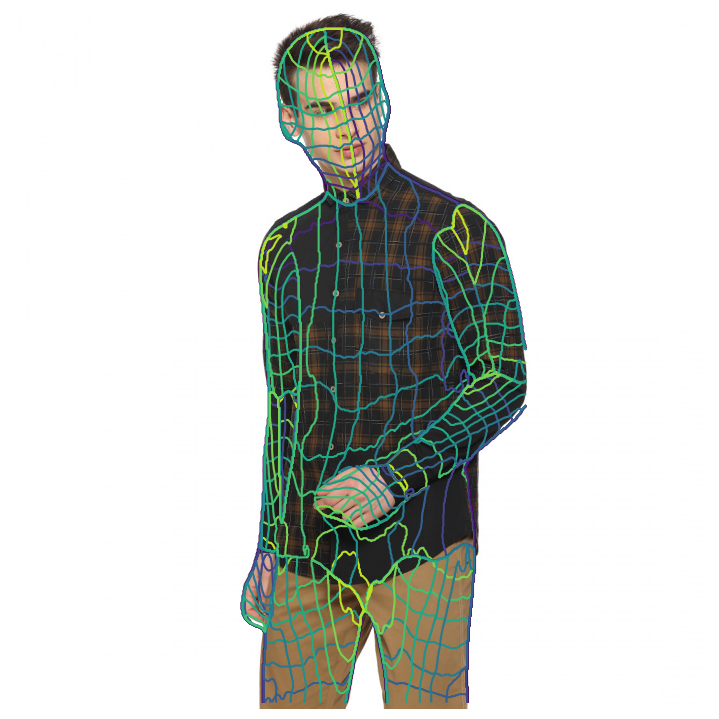

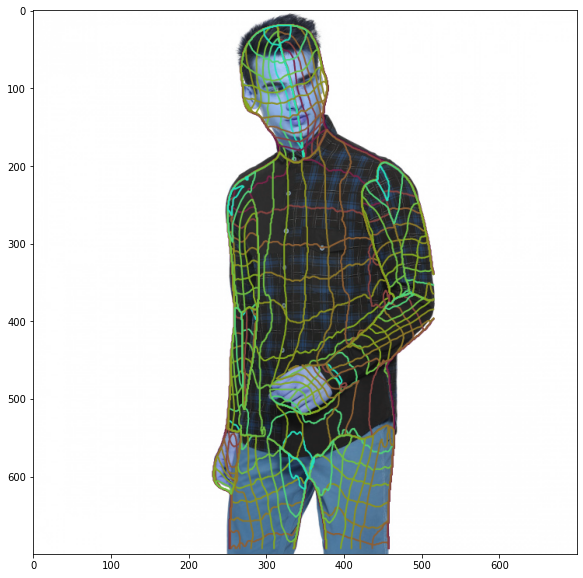

In [ ]:
%matplotlib inline

visualizers = [
    VISUALIZERS['dp_segm'](),
    VISUALIZERS['dp_contour'](),
    VISUALIZERS['dp_u'](),
    VISUALIZERS['dp_v']()
]

vs = visualizers[1]
ext = create_extractor(vs)

im = cv2.imread('/content/ss19shrt_hhchk1_m_pln_brbl_s.jpg')
(bbox, IUV, image_vis) = predict(im, ext, vs)

print('bbox:', bbox)
print('IUV.shape:', IUV.shape)

## Croppping image

In [ ]:
x, y, w, h = int(bbox[0]), int(bbox[1]), int(bbox[2]), int(bbox[3])
print('x y w h:', x, y, w, h)

crop_img = im[y:y+h, x:x+w]
print('crop img shape:', crop_img.shape)

x y w h: 229 9 286 683
crop img shape: (683, 286, 3)


## IUV

In [ ]:
def plot_uv(im, IUV):
    fig = plt.figure(figsize=[12,12])
    plt.imshow( im[:,:,::-1] )
    plt.contour( IUV[0,:,:]/256.,10, linewidths = 1 )
    plt.contour( IUV[1,:,:]/256.,10, linewidths = 1 )
    plt.contour( IUV[2,:,:]/256.,10, linewidths = 1 )
    plt.savefig('uv.jpg')

def plot_countour(im, mask):
    fig = plt.figure(figsize=[12,12])
    plt.imshow( im[:,:,::-1] )
    plt.contour( mask/256.,10, linewidths = 1)
    plt.savefig('counter.jpg')
    
def plot(im):
    fig = plt.figure(figsize=[12,12])
    plt.imshow(im)

In [ ]:
print(IUV.shape)
print(crop_img.shape)

(3, 683, 286)
(683, 286, 3)


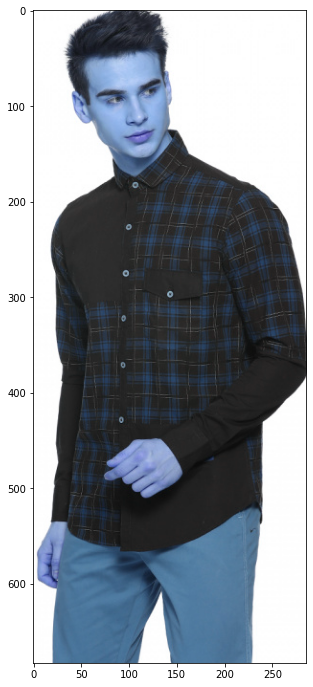

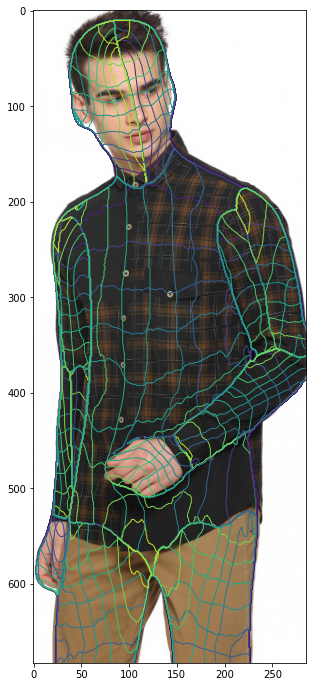

In [ ]:
plot(crop_img)
plot_uv(crop_img, IUV)

## Masking body parts



```
# This is formatted as code
```

1, 2 = Torso, 3 = Right Hand, 4 = Left Hand, 5 = Left Foot, 6 = Right Foot, 7, 9 = Upper Leg Right, 8, 10 = Upper Leg Left, 11, 13 = Lower Leg Right, 12, 14 = Lower Leg Left, 15, 17 = Upper Arm Left, 16, 18 = Upper Arm Right, 19, 21 = Lower Arm Left, 20, 22 = Lower Arm Right, 23, 24 = Head;

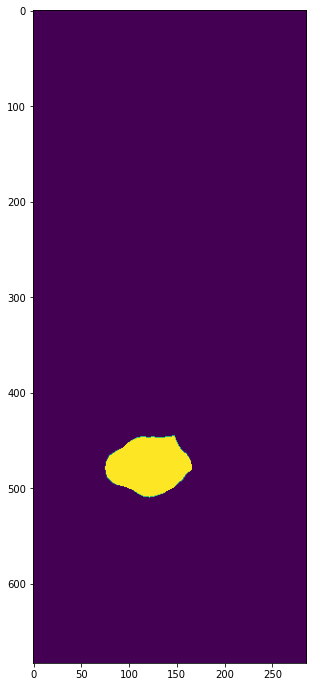

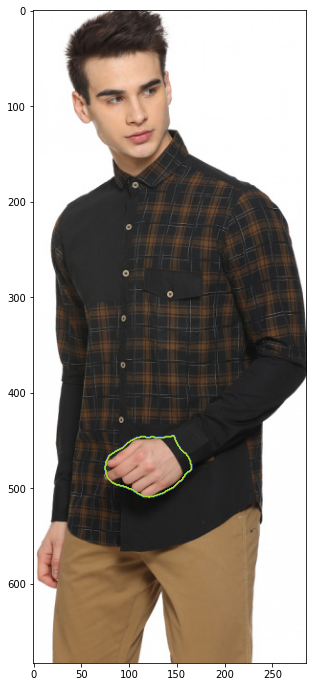

In [ ]:
# Extracting heads
head_mask = (IUV[0] == 4) + (IUV[0] == 4)
plot(head_mask)
plot_countour(crop_img, head_mask)

In [ ]:
head_mask = (IUV[0]==4) + (IUV[0]==4)

import numpy as np
import logging
from skimage.measure import find_contours, approximate_polygon
import matplotlib.pyplot as plt
import pycocotools.mask as mask_util
import torch

def mask2poly(mask, tolerance=1):
    
    arr = None
    if not isinstance(mask, np.ndarray): # Check if we have numpy array
        logging.error("mask must be of type numpy.array got " + str(type(mask)))
        return None, False
    elif mask.dtype == bool: # If boolean convert to integer and then float
        arr = mask.copy().astype(np.int64)
    elif issubclass(mask.dtype.type, np.integer) or \
        issubclass(mask.dtype.type, np.floating): # if integer check if binary
        arr = mask.copy().astype(np.int64)
    else:
        logging.error("only integer or floating type arrays supported")
        return None, False
    
    if not set(np.unique(arr).tolist()).issubset(set([0, 1])):
        logging.error("No values other than 0 and 1 are supported")
        return None, False
    
    arr = arr.astype(np.float64)
    level = 0.1
    contours = find_contours(arr, level,
                             fully_connected='low',
                             positive_orientation='low')
    
    polygons = [approximate_polygon(c, tolerance) for c in contours]

    # print("Counters  = >",contours)
    #print("Pollys  = >",polygons)    
    return polygons, True


poly= mask2poly(head_mask)

from matplotlib import pyplot
from shapely.geometry.polygon import LinearRing, Polygon
poly=((poly[0][0]))

poly

array([[509.9, 121. ],
       [508.9, 115. ],
       [498.9,  97. ],
       [494.9,  83. ],
       [488. ,  76.1],
       [480. ,  74.1],
       [472. ,  75.1],
       [464.1,  80. ],
       [457.1,  93. ],
       [451.1,  99. ],
       [446.1, 108. ],
       [446.1, 137. ],
       [444.1, 147. ],
       [458. , 153.9],
       [467. , 162.9],
       [475. , 165.9],
       [480. , 165.9],
       [499.9, 146. ],
       [505.9, 135. ],
       [509.9, 121. ]])

In [ ]:
# def iuvArr2IUV(iuv_arr):
#     iuv0 = iuv_arr[0,:,:]
#     iuv1 = iuv_arr[1,:,:]
#     iuv2 = iuv_arr[2,:,:]

#     return np.concatenate((iuv0[:,:,np.newaxis], iuv1[:,:,np.newaxis], iuv2[:,:,np.newaxis]), axis=2)

In [ ]:
# IUV = iuvArr2IUV(iuv_arr)

## Drawing bbox around mask

In [ ]:
def mask2bbox(mask):
    xs = np.where(np.sum(mask, axis=0) > 0)[0]
    ys = np.where(np.sum(mask, axis=1) > 0)[0]

    if len(xs) == 0 or len(ys) == 0:
        return None

    x0 = xs[0]
    x1 = xs[-1]

    y0 = ys[0]
    y1 = ys[-1]

    return np.array([x0, y0, x1, y1], dtype=np.float32)

In [ ]:
def draw_bbox(im, bbox):
    img = cv2.rectangle(im,(bbox[0],bbox[1]),(bbox[2],bbox[3]),(0,255,0),10)
    plot(img)

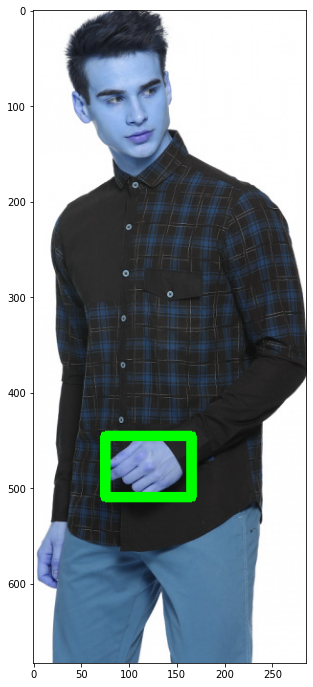

In [ ]:
head_bbox = mask2bbox(head_mask)
draw_bbox(crop_img.copy(), head_bbox)

In [ ]:
!pwd

/content


## DensePose1 to detectron2

In [ ]:
import numpy as np
import copy
import cv2
from scipy.io  import loadmat
import scipy.spatial.distance
import os 

#original code: https://github.com/linjunyu/Detectron2-Densepose-IUV2XYZ

class DensePoseMethods:
    def __init__(self, uv_processed_mat_path, UV_symmetry_path):
        #
        ALP_UV = loadmat(uv_processed_mat_path) # Use your own path
        self.FaceIndices = np.array( ALP_UV['All_FaceIndices']).squeeze()
        self.FacesDensePose = ALP_UV['All_Faces']-1
        self.U_norm = ALP_UV['All_U_norm'].squeeze()
        self.V_norm = ALP_UV['All_V_norm'].squeeze()
        self.All_vertices =  ALP_UV['All_vertices'][0]
        ## Info to compute symmetries.
        self.SemanticMaskSymmetries = [0,1,3,2,5,4,7,6,9,8,11,10,13,12,14]
        self.Index_Symmetry_List = [1,2,4,3,6,5,8,7,10,9,12,11,14,13,16,15,18,17,20,19,22,21,24,23];
        self.UV_symmetry_transformations = loadmat(UV_symmetry_path)
    

    def get_symmetric_densepose(self,I,U,V,x,y,Mask):
        ### This is a function to get the mirror symmetric UV labels.
        Labels_sym= np.zeros(I.shape)
        U_sym= np.zeros(U.shape)
        V_sym= np.zeros(V.shape)
        ###
        for i in ( range(24)):
            if i+1 in I:
                Labels_sym[I == (i+1)] = self.Index_Symmetry_List[i]
                jj = np.where(I == (i+1))
                ###
                U_loc = (U[jj]*255).astype(np.int64)
                V_loc = (V[jj]*255).astype(np.int64)
                ###
                V_sym[jj] = self.UV_symmetry_transformations['V_transforms'][0,i][V_loc,U_loc]
                U_sym[jj] = self.UV_symmetry_transformations['U_transforms'][0,i][V_loc,U_loc]
        ##
        Mask_flip = np.fliplr(Mask)
        Mask_flipped = np.zeros(Mask.shape)
        #
        for i in ( range(14)):
            Mask_flipped[Mask_flip == (i+1)] = self.SemanticMaskSymmetries[i+1]
        #
        [y_max , x_max ] = Mask_flip.shape
        y_sym = y
        x_sym = x_max-x
        #
        return Labels_sym , U_sym , V_sym , x_sym , y_sym , Mask_flipped
    
    
    
    def barycentric_coordinates_exists(self,P0, P1, P2, P):
        u = P1 - P0
        v = P2 - P0
        w = P - P0
        #
        vCrossW = np.cross(v,w)
        vCrossU = np.cross(v, u)
        if (np.dot(vCrossW, vCrossU) < 0):
            return False;
        #
        uCrossW = np.cross(u, w)
        uCrossV = np.cross(u, v)
        #
        if (np.dot(uCrossW, uCrossV) < 0):
            return False;
        #
        denom = np.sqrt((uCrossV**2).sum())
        r = np.sqrt((vCrossW**2).sum())/denom
        t = np.sqrt((uCrossW**2).sum())/denom
        #
        return((r <=1) & (t <= 1) & (r + t <= 1))

    def barycentric_coordinates(self,P0, P1, P2, P):
        u = P1 - P0
        v = P2 - P0
        w = P - P0
        #
        vCrossW = np.cross(v,w)
        vCrossU = np.cross(v, u)
        #
        uCrossW = np.cross(u, w)
        uCrossV = np.cross(u, v)
        #
        denom = np.sqrt((uCrossV**2).sum())
        r = np.sqrt((vCrossW**2).sum())/denom
        t = np.sqrt((uCrossW**2).sum())/denom
        #
        return(1-(r+t),r,t)
    
    def barycentric_coordinates_fast(self, P0, P1, P2, P):
        # This is a merge of barycentric_coordinates_exists & barycentric_coordinates.
        # Inputs are (n, 3) shaped.

        u = P1 - P0   #u is (n,3)
        v = P2 - P0   #v is (n,3)
        w = P.T - P0    #w is (n,3)
        #
        vCrossW = np.cross(v, w) #result is (n,3)
        vCrossU = np.cross(v, u) #result is (n,3)
        A = np.einsum('nd,nd->n', vCrossW, vCrossU) # vector-wise dot product. Result shape is (n,)
        #
        uCrossW = np.cross(u, w)
        uCrossV = - vCrossU
        B = np.einsum('nd,nd->n', uCrossW, uCrossV)
        #
        sq_denoms = np.einsum('nd,nd->n', uCrossV, uCrossV) #result shape is  (n,)
        sq_rs = np.einsum('nd,nd->n', vCrossW, vCrossW)
        sq_ts = np.einsum('nd,nd->n', uCrossW, uCrossW)
        rs = np.sqrt(sq_rs / sq_denoms)  #result shape is  (n,)
        ts = np.sqrt(sq_ts / sq_denoms)
        #
        results = [None] * P0.shape[0]
        for i in range(len(results)):
            if not (A[i] < 0 or B[i] < 0):
                if ((rs[i] <= 1) and (ts[i] <= 1) and (rs[i] + ts[i] <= 1)):
                    results[i] = (1 - (rs[i] + ts[i]) , rs[i], ts[i])
        return results


    def IUV2FBC_fast( self, I_point , U_point, V_point):
        P = np.array([ U_point , V_point , 0 ])
        
        FaceIndicesNow  = np.where( self.FaceIndices == I_point )
        
        FacesNow = self.FacesDensePose[FaceIndicesNow]
        #
        P_0 = np.vstack( (self.U_norm[FacesNow][:,0], self.V_norm[FacesNow][:,0], np.zeros(self.U_norm[FacesNow][:,0].shape))).transpose()
        P_1 = np.vstack( (self.U_norm[FacesNow][:,1], self.V_norm[FacesNow][:,1], np.zeros(self.U_norm[FacesNow][:,1].shape))).transpose()
        P_2 = np.vstack( (self.U_norm[FacesNow][:,2], self.V_norm[FacesNow][:,2], np.zeros(self.U_norm[FacesNow][:,2].shape))).transpose()
        #
        bcs = self.barycentric_coordinates_fast(P_0, P_1, P_2, P)
        for i, bc in enumerate(bcs):
            if bc is not None:
                bc1,bc2,bc3 = bc
                return(FaceIndicesNow[0][i],bc1,bc2,bc3)
        #
        # If the found UV is not inside any faces, select the vertex that is closest!
        #
        D1 = scipy.spatial.distance.cdist( np.array( [U_point,V_point])[np.newaxis,:] , P_0[:,0:2]).squeeze()
        D2 = scipy.spatial.distance.cdist( np.array( [U_point,V_point])[np.newaxis,:] , P_1[:,0:2]).squeeze()
        D3 = scipy.spatial.distance.cdist( np.array( [U_point,V_point])[np.newaxis,:] , P_2[:,0:2]).squeeze()
        #
        minD1 = D1.min()
        minD2 = D2.min()
        minD3 = D3.min()
        #
        if((minD1< minD2) & (minD1< minD3)):
            return(  FaceIndicesNow[0][np.argmin(D1)] , 1.,0.,0. )
        elif((minD2< minD1) & (minD2< minD3)):
            return(  FaceIndicesNow[0][np.argmin(D2)] , 0.,1.,0. )
        else:
            return(  FaceIndicesNow[0][np.argmin(D3)] , 0.,0.,1. )


    def IUV2FBC( self, I_point , U_point, V_point):
        P = [ U_point , V_point , 0 ]
        FaceIndicesNow  = np.where( self.FaceIndices == I_point )
        FacesNow = self.FacesDensePose[FaceIndicesNow]
        #
        P_0 = np.vstack( (self.U_norm[FacesNow][:,0], self.V_norm[FacesNow][:,0], np.zeros(self.U_norm[FacesNow][:,0].shape))).transpose()
        P_1 = np.vstack( (self.U_norm[FacesNow][:,1], self.V_norm[FacesNow][:,1], np.zeros(self.U_norm[FacesNow][:,1].shape))).transpose()
        P_2 = np.vstack( (self.U_norm[FacesNow][:,2], self.V_norm[FacesNow][:,2], np.zeros(self.U_norm[FacesNow][:,2].shape))).transpose()
        #

        for i, [P0,P1,P2] in enumerate( zip(P_0,P_1,P_2)) :
            if(self.barycentric_coordinates_exists(P0, P1, P2, P)):
                [bc1,bc2,bc3] = self.barycentric_coordinates(P0, P1, P2, P)
                return(FaceIndicesNow[0][i],bc1,bc2,bc3)
        #
        # If the found UV is not inside any faces, select the vertex that is closest!
        #
        D1 = scipy.spatial.distance.cdist( np.array( [U_point,V_point])[np.newaxis,:] , P_0[:,0:2]).squeeze()
        D2 = scipy.spatial.distance.cdist( np.array( [U_point,V_point])[np.newaxis,:] , P_1[:,0:2]).squeeze()
        D3 = scipy.spatial.distance.cdist( np.array( [U_point,V_point])[np.newaxis,:] , P_2[:,0:2]).squeeze()
        #
        minD1 = D1.min()
        minD2 = D2.min()
        minD3 = D3.min()
        #
        if((minD1< minD2) & (minD1< minD3)):
            return(  FaceIndicesNow[0][np.argmin(D1)] , 1.,0.,0. )
        elif((minD2< minD1) & (minD2< minD3)):
            return(  FaceIndicesNow[0][np.argmin(D2)] , 0.,1.,0. )
        else:
            return(  FaceIndicesNow[0][np.argmin(D3)] , 0.,0.,1. )


    def FBC2PointOnSurface( self, FaceIndex, bc1,bc2,bc3,Vertices ):
        ##
        Vert_indices = self.All_vertices[self.FacesDensePose[FaceIndex]]-1
        ##
        p = Vertices[Vert_indices[0],:] * bc1 +  \
            Vertices[Vert_indices[1],:] * bc2 +  \
            Vertices[Vert_indices[2],:] * bc3 
        ##
        return(p)

print('done')

done


In [ ]:
from mpl_toolkits.mplot3d import axes3d, Axes3D #Matplootlib
from tqdm import tqdm #progressbar
import time
import matplotlib.pyplot as plt
import pickle
import gzip

## SMPL - Skinned Multi-Person Linear Model    
SMPL is a realistic 3D model of the human body that is based on skinning and blend shapes and is learned from thousands of 3D body scans.
https://smpl.is.tue.mpg.de/

In [ ]:
!pip install chumpy

     |████████████████████████████████| 51kB 2.6MB/s 
  Created wheel for chumpy: filename=chumpy-0.70-cp36-none-any.whl size=58293 sha256=e629983d65c3fe57e69dc7015eb41cccd94988fccd076f9f4e247b214585dbd1
  Stored in directory: /root/.cache/pip/wheels/0a/73/91/b8dbef9746a907c8c008fc194a9691224ca3371b55f16f1dbd
Successfully built chumpy


In [ ]:
with open('/content/basicModel_f_lbs_10_207_0_v1.0.0.pkl', 'rb') as d:
  # u = pickle._Unpickler(d,)
  # u.encoding = "latin1"
  data = pickle.load(d, encoding='latin1')
  Vertices = data['v_template'] 
  X,Y,Z = [Vertices[:,0], Vertices[:,1],Vertices[:,2]]

    # u = pickle._Unpickler(d,)
    # u.encoding = "latin1"

In [ ]:
personId = 1

# Human coordinates
C = np.where(IUV[0,:,:] >= personId)
# C =(IUV[0] == 4) + (IUV[0] == 4)
print(C)
print('num pts on picked person:', C[0].shape)

(array([ 10,  10,  10, ..., 682, 682, 682]), array([ 84,  85,  86, ..., 224, 225, 226]))
num pts on picked person: (126062,)


In [ ]:
INDS =IUV[0,:,:]

In [ ]:
IUV.shape

(3, 683, 286)

In [ ]:
def invertIUV(iuv_arr):
    iuv0 = iuv_arr[0,:,:]
    iuv1 = iuv_arr[1,:,:]
    iuv2 = iuv_arr[2,:,:]

    return np.concatenate((iuv0[:,:,np.newaxis], iuv1[:,:,np.newaxis], iuv2[:,:,np.newaxis]), axis=2)

IUV = invertIUV(IUV)

In [ ]:
IUV.shape

(683, 286, 3)

In [ ]:
IUV_person = IUV[C[0], C[1], :] # boolean indexing
IUV_person = IUV_person.astype(np.float)
IUV_person[:, 1:3] = IUV_person[:, 1:3] / 255.0


In [ ]:
collected_x = np.zeros(C[0].shape)
collected_y = np.zeros(C[0].shape)
collected_z = np.zeros(C[0].shape)

collected_x,collected_y,collected_z


(array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]))

In [ ]:
!git clone https://github.com/italojs/DensePoseImplementation.git

Cloning into 'DensePoseImplementation'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [ ]:
DP = DensePoseMethods('/content/DensePoseImplementation/UV_Processed.mat', '/content/DensePoseImplementation/UV_symmetry_transforms.mat')
pbar = tqdm(total=IUV_person.shape[0])
for i in range(IUV_person.shape[0]):
    pbar.update(1) # Use tqdm to visualize the converting process

    # Convert IUV to FBC (faceIndex and barycentric coordinates.)
    FaceIndex,bc1,bc2,bc3 = DP.IUV2FBC_fast(IUV_person[i, 0], IUV_person[i, 1], IUV_person[i, 2])
    # Use FBC to get 3D coordinates on the surface.
    p = DP.FBC2PointOnSurface(FaceIndex, bc1,bc2,bc3,Vertices)
    
    collected_x[i] = p[0]
    collected_y[i] = p[1]
    collected_z[i] = p[2]

pbar.close()
print('IUV to PointOnSurface done')
IUV.shape: (750, 268, 3)


100%|██████████| 126062/126062 [02:17<00:00, 918.23it/s] 

IUV to PointOnSurface done


In [ ]:
print(collected_x,collected_y,collected_z)
fig = plt.figure(figsize=[20,7])

ax = fig.add_subplot(131, projection='3d')


fac = 8
ax.scatter(Z, X, Y, s=10,c='k',alpha=0.1);
ax.scatter(Z[28], X[28], Y[28], s=100,c='red');
ax.scatter(Z[17], X[17], Y[17], s=100,c='yellow');


#ax.scatter(Z,X,Y,s=0.02,c='k')
# smpl_view_set_axis_full_body(ax)

ax.view_init(0, 0)

ax.view_init(0, 0)
max_range = 0.55
ax.set_xlim(- max_range, max_range)
ax.set_ylim(- max_range, max_range)
ax.set_zlim(-0.2 - max_range, -0.2 + max_range)


NameError: ignored

[-0.01229205  0.01398685  0.01398685 ...  0.13955462  0.13942887
  0.13991003] [ 0.52880326  0.52843816  0.52843816 ... -0.5966957  -0.59447812
 -0.59249076] [0.05020387 0.05033867 0.05033867 ... 0.0456419  0.04665168 0.04670564]


(-0.75, 0.35000000000000003)

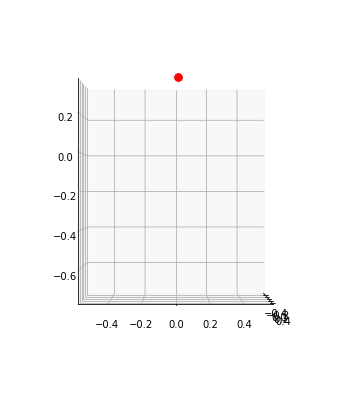

In [ ]:
print(collected_x,collected_y,collected_z)
fig = plt.figure(figsize=[20,7])

ax = fig.add_subplot(131, projection='3d')


fac = 8
ax.scatter(Z[20], X[20], Y[20], s=60,c='red');
#ax.scatter(Z,X,Y,s=0.02,c='k')
# smpl_view_set_axis_full_body(ax)

ax.view_init(0, 0)

ax.view_init(0, 0)
max_range = 0.55
ax.set_xlim(- max_range, max_range)
ax.set_ylim(- max_range, max_range)
ax.set_zlim(-0.2 - max_range, -0.2 + max_range)


X =>  -0.8348562052119689 0.8355870588996553
Y =>  -1.1207333329572255 0.5376614971268027
Z =>  -0.11985265870181908 0.16712141264858477
6890
Distance is =>  2.371288305688019
distance_x => 1.6704432641116242 distance_y => 1.658394830084028 distance_z => 0.28697407135040387
Eclidian Distance => 2.353859407667614
Y_pt distance => 1.658394830084028


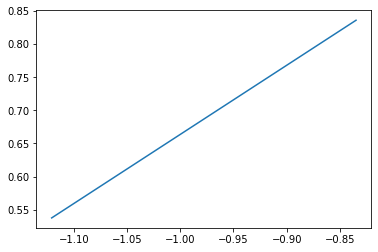

In [ ]:
#plt.plot(X,Y)

X.shape[0]/2
print('X => ',min(X),max(X))
print("Y => ",min(Y),max(Y))
print("Z => ",min(Z),max(Z))

print(len(Z))

p1=(min(X),min(Y))
p2= (max(X),max(Y))

Y_pt1 = (0,min(Y))
Y_pt2 = (0,max(Y))
import math 
  
# Function to find distance 
def distance(x1, y1, z1, x2, y2, z2):  
       
    d = math.sqrt(math.pow(x2 - x1, 2) +
                math.pow(y2 - y1, 2) +
                math.pow(z2 - z1, 2)* 1.0) 
    print("Distance is => " ,d) 
   

distance(max(X),max(Y),max(Z),min(X),min(Y),min(Z))    

distance_x = np.linalg.norm(min(X) - max(X))
distance_y = np.linalg.norm(min(Y) - max(Y))
distance_z = np.linalg.norm(min(Z) - max(Z))
print("distance_x =>",distance_x,"distance_y =>",distance_y,"distance_z =>",distance_z)
from scipy.spatial import distance
print("Eclidian Distance =>",distance.euclidean(p1, p2))
plt.plot(p1,p2)


print('Y_pt distance =>', distance.euclidean(Y_pt1, Y_pt2))

# GROUND TRUTH => X = 200cm APrrx
#                 Y = 165CM Accurate
#Neck Shoulder hand Wrist

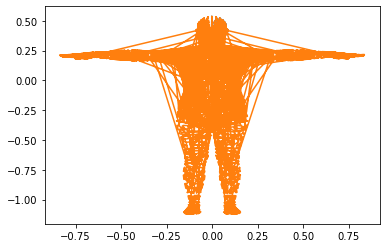

In [ ]:
plt.plot(X[0:int(3445/6)],Y[0:int(3445/6)])     #0:3445/6
plt.plot(X,Y)

In [ ]:
# Now read the smpl model.
with open('/content/basicModel_f_lbs_10_207_0_v1.0.0.pkl', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    p = u.load()
    data = p

    Vertices = data['v_template']  ##  Loaded vertices of size (6890, 3)
    X,Y,Z = [Vertices[:,0], Vertices[:,1],Vertices[:,2]]

# Color of each (U,V) point.
C = np.where(IUV[:,:,0] >= personId)
# C[0] is x-coords  np.array([23,  23,   24, ..])
# C[1] is y-coords  np.array([127, 128, 130, ..])
print('num pts on picked person:', C[0].shape)
person_color = crop_img[C[0], C[1], ::-1]  # boolean indexing.   ::-1 to make the RGB/BGR convention suitable for plotting.
print('person color shape:', person_color.shape)

num pts on picked person: (126062,)
person color shape: (126062, 3)


In [ ]:
data

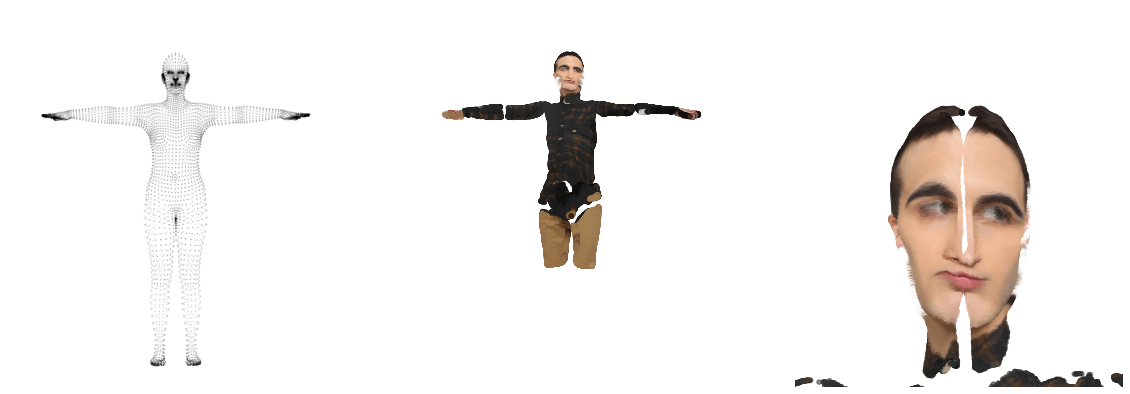

In [ ]:
def smpl_view_set_axis_full_body(ax):
    ## Manually set axis
    ax.view_init(0, 0)
    max_range = 0.55
    ax.set_xlim(- max_range, max_range)
    ax.set_ylim(- max_range, max_range)
    ax.set_zlim(-0.2 - max_range, -0.2 + max_range)
    ax.axis('off')

def smpl_view_set_axis_face(ax):
    ## Manually set axis
    ax.view_init(0, 0)
    max_range = 0.1
    ax.set_xlim(-max_range, max_range)
    ax.set_ylim(-max_range, max_range)
    ax.set_zlim(0.45 - max_range, 0.45 + max_range)
    ax.axis('off')

fig = plt.figure(figsize=[20,7])

## Visualize the full body smpl male template model and collected points
ax = fig.add_subplot(131, projection='3d')
ax.scatter(Z,X,Y,s=0.02,c='k')
smpl_view_set_axis_full_body(ax)

## Visualize the full body smpl male template model and collected points
ax = fig.add_subplot(132, projection='3d')
# ax.scatter(Z,X,Y,s=0.02,c='k')
ax.scatter(collected_z,  collected_x, collected_y,  c= person_color/255.0   )  #s=__ size
smpl_view_set_axis_full_body(ax)

## Now zoom into the face.
ax = fig.add_subplot(133, projection='3d')
# ax.scatter(Z,X,Y,s=0.2,c='k')
ax.scatter(collected_z,  collected_x, collected_y,c=person_color/255.0) #s=__ size
smpl_view_set_axis_face(ax)

plt.show()

In [ ]:
!git clone https://github.com/autocyz/2DJoint-3DSMPL.git

Cloning into '2DJoint-3DSMPL'...
remote: Enumerating objects: 51, done.
remote: Total 51 (delta 0), reused 0 (delta 0), pack-reused 51
Unpacking objects: 100% (51/51), done.


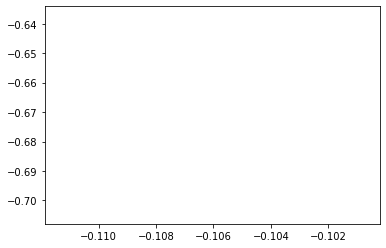

In [ ]:
plt.plot(-0.10604072, -0.67102962)

In [ ]:
Jtr=data['J']

In [ ]:
diff3d = np.array([Jtr[9] - Jtr[3], Jtr[8] - Jtr[2]])
mean_height3d = np.mean(np.sqrt(np.sum(diff3d**2, axis=1)))

In [ ]:
mean_height3d

0.4675409733520216

In [ ]:
data

{'J': array([[-8.76308970e-04, -2.11418723e-01,  2.78211200e-02],
        [ 7.04848876e-02, -3.01002533e-01,  1.97749280e-02],
        [-6.98883278e-02, -3.00379160e-01,  2.30254335e-02],
        [-3.38451650e-03, -1.08161861e-01,  5.63597909e-03],
        [ 1.01153808e-01, -6.65211904e-01,  1.30860155e-02],
        [-1.06040718e-01, -6.71029623e-01,  1.38401121e-02],
        [ 1.96440985e-04,  1.94957852e-02,  3.92296547e-03],
        [ 8.95999143e-02, -1.04856032e+00, -3.04155922e-02],
        [-9.20120818e-02, -1.05466743e+00, -2.80514913e-02],
        [ 2.22362284e-03,  6.85680141e-02,  3.17901760e-02],
        [ 1.12937580e-01, -1.10320516e+00,  8.39545265e-02],
        [-1.14055299e-01, -1.10107698e+00,  8.98482216e-02],
        [ 2.60992373e-04,  2.76811197e-01, -1.79753042e-02],
        [ 7.75218998e-02,  1.86348444e-01, -5.08464100e-03],
        [-7.48091986e-02,  1.84174211e-01, -1.00204779e-02],
        [ 3.77815350e-03,  3.39133394e-01,  3.22299558e-02],
        [ 1.6283901

In [ ]:
data['v_template'][6260]
X[323], Y[323], Z[323]
ax.scatter(z[323], X[323], Y[323], s=10,c='k');
plt.plot()

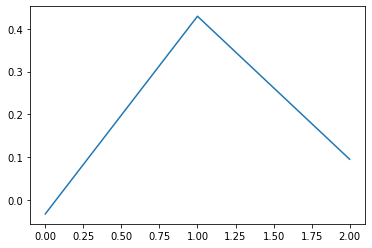

In [ ]:
plt.plot(data['v_template'][6260])